In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [35]:
df = pd.read_csv("arrests.csv")
df.dropna(inplace=True)
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
5,24288194,09/13/2006,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100E,M,K,77,2.0,45-64,M,BLACK,1004580.0,183838.0,40.671254,-73.926714,POINT (-73.926713851 40.67125445700003)
6,189182271,10/24/2018,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,M,5,0.0,45-64,M,WHITE HISPANIC,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025)


In [36]:
import shapely.wkt

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5279617 entries, 1 to 5308875
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 805.6+ MB


In [38]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [39]:
geo_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,geometry
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),POINT (-73.94111 40.80069)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035),POINT (-73.95034 40.64865)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),POINT (-73.93022 40.67458)
5,24288194,09/13/2006,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100E,M,K,77,2.0,45-64,M,BLACK,1004580.0,183838.0,40.671254,-73.926714,POINT (-73.926713851 40.67125445700003),POINT (-73.92671 40.67125)
6,189182271,10/24/2018,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,M,5,0.0,45-64,M,WHITE HISPANIC,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025),POINT (-73.99749 40.71620)


In [40]:
wkt_polygon = "POLYGON((-79.7624 42.5142,-79.0672 42.7783,-78.9313 42.8508,-78.9024 42.9061,-78.9313 42.9554,-78.9656 42.9584,-79.0219 42.9886,-79.0027 43.0568,-79.0727 43.0769,-79.0713 43.1220,-79.0302 43.1441,-79.0576 43.1801,-79.0604 43.2482,-79.0837 43.2812,-79.2004 43.4509,-78.6909 43.6311,-76.7958 43.6321,-76.4978 43.9987,-76.4388 44.0965,-76.3536 44.1349,-76.3124 44.1989,-76.2437 44.2049,-76.1655 44.2413,-76.1353 44.2973,-76.0474 44.3327,-75.9856 44.3553,-75.9196 44.3749,-75.8730 44.3994,-75.8221 44.4308,-75.8098 44.4740,-75.7288 44.5425,-75.5585 44.6647,-75.4088 44.7672,-75.3442 44.8101,-75.3058 44.8383,-75.2399 44.8676,-75.1204 44.9211,-74.9995 44.9609,-74.9899 44.9803,-74.9103 44.9852,-74.8856 45.0017,-74.8306 45.0153,-74.7633 45.0046,-74.7070 45.0027,-74.5642 45.0007,-74.1467 44.9920,-73.7306 45.0037,-73.4203 45.0085,-73.3430 45.0109,-73.3547 44.9874,-73.3379 44.9648,-73.3396 44.9160,-73.3739 44.8354,-73.3324 44.8013,-73.3667 44.7419,-73.3873 44.6139,-73.3736 44.5787,-73.3049 44.4916,-73.2953 44.4289,-73.3365 44.3513,-73.3118 44.2757,-73.3818 44.1980,-73.4079 44.1142,-73.4367 44.0511,-73.4065 44.0165,-73.4079 43.9375,-73.3749 43.8771,-73.3914 43.8167,-73.3557 43.7790,-73.4244 43.6460,-73.4340 43.5893,-73.3969 43.5655,-73.3818 43.6112,-73.3049 43.6271,-73.3063 43.5764,-73.2582 43.5675,-73.2445 43.5227,-73.2582 43.2582,-73.2733 42.9715,-73.2898 42.8004,-73.2664 42.7460,-73.3708 42.4630,-73.5095 42.0840,-73.4903 42.0218,-73.4999 41.8808,-73.5535 41.2953,-73.4834 41.2128,-73.7275 41.1011,-73.6644 41.0237,-73.6578 40.9851,-73.6132 40.9509,-72.4823 41.1869,-72.0950 41.2551,-71.9714 41.3005,-71.9193 41.3108,-71.7915 41.1838,-71.7929 41.1249,-71.7517 41.0462,-72.9465 40.6306,-73.4628 40.5368,-73.8885 40.4887,-73.9490 40.5232,-74.2271 40.4772,-74.2532 40.4861,-74.1866 40.6468,-74.0547 40.6556,-74.0156 40.7618,-73.9421 40.8699,-73.8934 40.9980,-73.9854 41.0343,-74.6274 41.3268,-74.7084 41.3583,-74.7101 41.3811,-74.8265 41.4386,-74.9913 41.5075,-75.0668 41.6000,-75.0366 41.6719,-75.0545 41.7672,-75.1945 41.8808,-75.3552 42.0013,-75.4266 42.0003,-77.0306 42.0013,-79.7250 41.9993,-79.7621 42.0003,-79.7621 42.1827,-79.7621 42.5146,-79.7624 42.5142))"

# Crea un diccionario con los datos del polígono
data = {
    'ID': [1],  # Puedes agregar un identificador o más columnas
    'Geometry': [wkt_polygon]
}

# Crea el DataFrame
ny = pd.DataFrame(data)

In [41]:
ny['Geometry'] = ny['Geometry'].apply(shapely.wkt.loads)
geo_ny = gpd.GeoDataFrame(ny, geometry='Geometry')
type(geo_ny)

geopandas.geodataframe.GeoDataFrame

<Axes: >

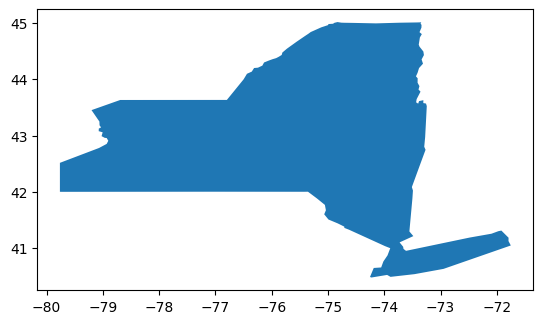

In [42]:
geo_ny.plot()